In [1]:
import keithley_controller as kc
import numpy as np
import matplotlib.pyplot as plt

ctrl = kc.hlab_2450( verbose= False )
ctrl.current_device()

Using pyvisa-py backend

Resetting...


KEITHLEY INSTRUMENTS,MODEL 2450,04451534,1.6.7c



In [2]:
# Run Simple Resistance Measurements

(data, header) = ctrl.measure_resistance( FOUR_OR_TWO="2PT", NUM_POINTS=10, INTERVAL=1, SOURCE_CURRENT= 0.001, VOLTAGE_LIMIT=2, SENSE_RANGE="AUTO", NUM_SAMPLES=5, NPLC=0.1 )

savedir = "data"
sample_name = "test_2450"
experiment = "test_resistor"
ctrl.save_as_csv( data, header, savedir, sample_name, experiment )

2 Point Resistance Measurement:
Sample Time: 1
Sourcing Current: 0.001A

Voltage Limit: 0.001V

Sense Range: AUTO


[Time (s),Source Current Mean (A),Source Current Std (A),Measured Voltage Mean(V),Measured Voltage Std (V),Resistance (Ohm)]
[0.001, +9.999918E-04, +4.605388E-09, +2.205288E-01, +2.536604E-05, +2.205306E+02]
[1.006, +9.999915E-04, +2.596459E-09, +2.205206E-01, +2.940867E-05, +2.205225E+02]
[2.013, +9.999927E-04, +1.664452E-09, +2.205355E-01, +2.790968E-05, +2.205371E+02]
[3.021, +9.999921E-04, +1.316662E-09, +2.205270E-01, +2.946374E-05, +2.205287E+02]
[4.028, +9.999917E-04, +2.238392E-09, +2.205301E-01, +2.813778E-05, +2.205319E+02]
[5.032, +9.999915E-04, +1.349074E-09, +2.205323E-01, +2.899913E-05, +2.205342E+02]
[6.040, +9.999914E-04, +1.263962E-09, +2.205221E-01, +2.941358E-05, +2.205240E+02]
[7.046, +9.999905E-04, +2.474187E-09, +2.205349E-01, +2.984176E-05, +2.205370E+02]
[8.049, +9.999904E-04, +2.454058E-09, +2.205332E-01, +2.840897E-05, +2.205353E+02]
[9.053, +9.9

Sense Range: AUTO
4 Point Resistance Measurement:
Sample Time: 0.01
[Time (s),Current Mean (A),Current Std (A),Voltage Mean (V),Voltage Std (V)]
[0.001, -9.998908E-04, +3.168684E-08, -2.202165E-01, +4.041047E-05]
[0.022, -8.997338E-04, +7.977056E-08, -1.981223E-01, +4.336752E-05]
[0.050, -7.998192E-04, +6.950104E-08, -1.761421E-01, +4.831436E-05]
[0.070, -6.999741E-04, +9.087355E-08, -1.541290E-01, +7.968888E-05]
[0.090, -5.997928E-04, +4.685040E-09, -1.320744E-01, +5.757531E-05]
[0.110, -4.998903E-04, +7.927734E-08, -1.100417E-01, +5.038381E-05]
[0.130, -3.997261E-04, +7.824739E-08, -8.808925E-02, +5.856648E-05]
[0.151, -2.998483E-04, +4.227191E-08, -6.604766E-02, +7.156342E-05]
[0.170, -2.000415E-04, +5.187107E-08, -4.403649E-02, +6.036203E-05]
[0.191, -9.993142E-05, +9.815105E-08, -2.203981E-02, +5.516644E-05]
[0.211, -7.682255E-07, +1.060461E-06, -1.055913E-04, +2.443885E-04]
[0.238, +1.000681E-04, +5.210738E-08, +2.201170E-02, +5.985167E-05]
[0.273, +1.999135E-04, +9.401850E-08, +

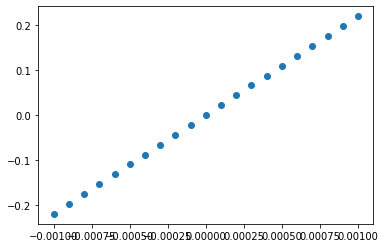

In [5]:
# Run IV Current Sweep
I_START = -0.001
I_END = 0.001
NUM_POINTS = 21
CURRENTS = np.linspace( I_START, I_END, NUM_POINTS )

(data, header) = ctrl.measure_IV_Sweep( SOURCE_TYPE="CURR", SOURCE_VALUES=CURRENTS, FOUR_OR_TWO="4PT", SOURCE_LIMIT="N/A", SENSE_RANGE="AUTO", INTERVAL=0.01, NUM_SAMPLES = 5, NPLC=0.01)
savedir = "data"
sample_name = "test_2450"
experiment = "test_I_sweep"
ctrl.save_as_csv( data, header, savedir, sample_name, experiment )

data = np.array(data)
plt.scatter(data[:,1],data[:,3])
plt.show()



Source Limit: 0.1A

Sense Range: AUTO
4 Point Resistance Measurement:
Sample Time: 0.1
[Time (s),Voltage Mean (V),Voltage Std (V),Current Mean (A),Current Std (A)]
[0.001, -9.886160E-04, +3.171349E-05, -4.596959E-06, +9.314785E-08]
[0.185, -7.151483E-04, +1.356472E-04, -3.122491E-06, +5.853226E-07]
[0.291, -5.969757E-04, +1.092399E-04, -2.749706E-06, +6.358799E-07]
[0.398, -5.539012E-04, +1.435838E-04, -2.502056E-06, +5.018930E-07]
[0.506, -4.870232E-04, +2.602419E-05, -2.129861E-06, +4.103960E-07]
[0.613, -4.079570E-04, +9.454944E-05, -1.843945E-06, +3.790131E-07]
[0.720, -3.419276E-04, +4.045868E-05, -1.554418E-06, +1.501943E-07]
[0.827, -1.597162E-04, +9.155367E-05, -7.724811E-07, +4.596753E-08]
[0.935, -3.701018E-05, +5.661696E-05, -3.168523E-07, +4.699815E-08]
[1.042, -2.964233E-05, +7.048533E-05, -1.895611E-07, +2.186832E-08]
[1.149, +1.768220E-05, +4.339470E-05, -1.820064E-08, +7.742428E-10]
[1.309, +5.027045E-05, +4.418347E-05, +6.538276E-08, +1.905655E-09]
[2.053, +1.834573E-0

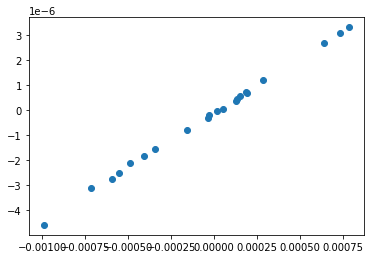

In [4]:
# Run IV Voltage Sweep
V_START = -0.2
V_END = 0.2
NUM_POINTS = 21
VOTLAGES = np.linspace( V_START, V_END, NUM_POINTS )

(data, header) = ctrl.measure_IV_Sweep( SOURCE_TYPE="VOLT", SOURCE_VALUES=VOTLAGES, FOUR_OR_TWO="4PT", SOURCE_LIMIT=0.1, SENSE_RANGE="AUTO", INTERVAL=0.1, NUM_SAMPLES = 5, NPLC=0.01)
savedir = "data"
sample_name = "test_2450"
experiment = "test_V_sweep"
ctrl.save_as_csv( data, header, savedir, sample_name, experiment )

data = np.array(data)
plt.scatter(data[:,1],data[:,3])
plt.show()